In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('./StoreOrders.limit10000.csv')

In [13]:
df.columns

Index(['rowid', 'orderid', 'orderdate', 'orderpriority', 'orderquantity',
       'sales', 'discount', 'shipmode', 'profit', 'unitprice', 'shippingsost',
       'customername', 'province', 'region', 'customersegment',
       'productcategory', 'productsubcategory', 'productname',
       'productcontainer', 'productbasemargin', 'shipdate'],
      dtype='object')

In [35]:
df['dateObj'][0].strftime('%b')

'Oct'

In [39]:
df['dateObj'] = pd.to_datetime(df['orderdate'])
df['orderYear'] = [x.year for x in df['dateObj']]
df['orderMonth'] = [x.month for x in df['dateObj']]

In [15]:
df['orderYear'].unique()

array([2014, 2016, 2015, 2013], dtype=int64)

In [26]:
subDF = df[df['orderYear']==2014]

In [29]:
subDF.groupby('orderMonth').sum()

,rowid,orderid,orderquantity,sales,discount,profit,unitprice,shippingsost,orderYear
orderMonth,,,,,,,,,
1,59872,427854,377,21989.1120,0.95,1801.29,751.77,198.68,32224
2,131187,934831,681,72047.7990,1.31,6602.62,2543.19,473.62,58406
3,96582,687005,516,31629.4885,1.00,2400.85,1120.74,226.30,38266
4,26612,191233,238,20932.3265,0.87,724.00,1030.56,199.12,24168
5,160567,1145710,633,49710.7200,1.05,10720.67,2379.51,338.81,56392
6,128856,918421,884,66195.2845,1.39,2666.37,2302.62,406.78,66462
7,89679,640011,559,20208.8810,0.91,2270.62,909.03,101.14,40280
8,134769,963491,854,35210.0605,1.96,4210.47,1731.80,370.78,76532
9,68045,484971,507,44547.0655,1.21,4086.85,1869.22,311.27,38266


Dropdown(description='Number:', options=(2014, 2016, 2015, 2013), value=2014)

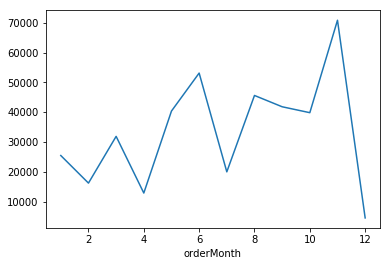

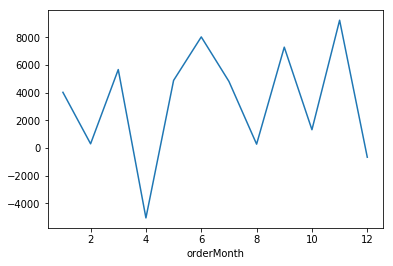

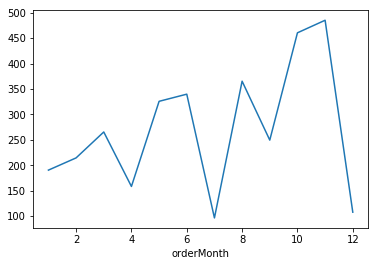

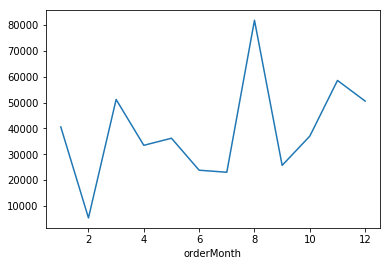

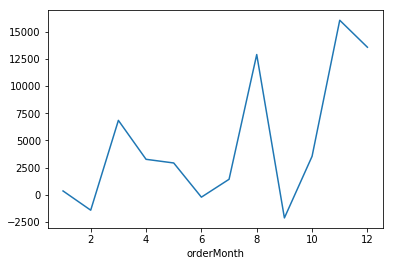

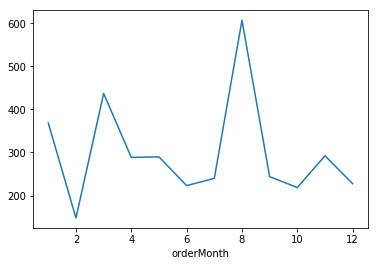

In [41]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

d = widgets.Dropdown(
    options=df['orderYear'].unique(),
    value=2014,
    description='Number:',
    disabled=False,
)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        subDF = df[df['orderYear']==d.value]
        subDF.groupby('orderMonth').sum()['sales'].plot()
        plt.show()
        subDF.groupby('orderMonth').sum()['profit'].plot()
        plt.show()
        subDF.groupby('orderMonth').sum()['shippingsost'].plot()

        

d.observe(on_change)
display(d)


In [19]:
d.value

2016

In [23]:
w = widgets.Dropdown(
    options=['Addition', 'Multiplication', 'Subtraction'],
    value='Addition',
    description='Task:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)

Dropdown(description='Task:', options=('Addition', 'Multiplication', 'Subtraction'), value='Addition')

changed to Multiplication
changed to Subtraction
changed to Addition
changed to Multiplication
